 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [54]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import csv

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [55]:
whale_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\whale_returns.csv")

In [84]:
# Reading whale returns
whale_reader_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_reader_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [85]:
# Count nulls
whale_reader_df.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [86]:
# Drop nulls
whale_reader_df = whale_reader_df.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [87]:
# Reading algorithmic returns
algorithmic_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\algo_returns.csv")
algorithmic_reader_df = pd.read_csv(algorithmic_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algorithmic_reader_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [88]:
# Count nulls
algorithmic_reader_df.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [89]:
# Drop nulls
algorithmic_reader_df = algorithmic_reader_df.dropna().copy()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [90]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\sp_tsx_history.csv")
sp_tsx_reader_df = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [91]:
# Check Data Types
data_types = sp_tsx_reader_df.dtypes

In [92]:
# Fix Data Types
#sp_tsx_reader_df["Date"] = pd.to_datetime(sp_tsx_reader_df["Date"]).dt.strftime("%Y-%m-%d")
sp_tsx_reader_df["Close"] = sp_tsx_reader_df["Close"].str.replace('$', '')
sp_tsx_reader_df["Close"] = sp_tsx_reader_df["Close"].str.replace(',', '')
sp_tsx_reader_df["Close"] = sp_tsx_reader_df["Close"].astype(float)
sp_tsx_reader_df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_19844\3723979680.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_reader_df["Close"] = sp_tsx_reader_df["Close"].str.replace('$', '')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [95]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_reader_df.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [118]:
data_types = sp_tsx_returns.dtypes
data_types

Daily Returns    float64
dtype: object

In [96]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna().copy()

In [97]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_reader_df = sp_tsx_reader_df.rename(columns = {"Close":"Daily Returns"})
sp_tsx_reader_df.head()

,Daily Returns
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [180]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
single_df = pd.concat([whale_reader_df, algorithmic_reader_df, sp_tsx_reader_df], axis = "columns", join = "inner")
single_df = single_df.sort_index(ascending = True)
single_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'S&P TSX History'}, xlabel='Date'>

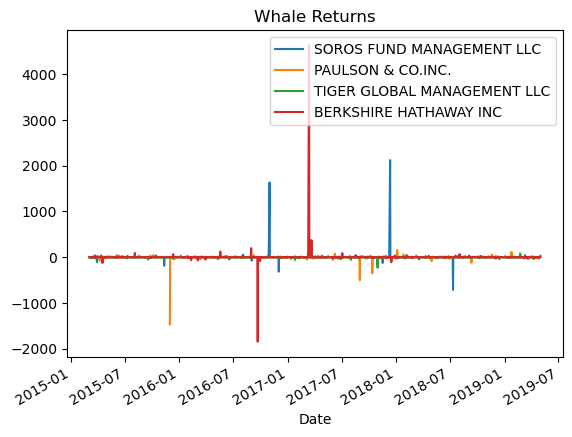

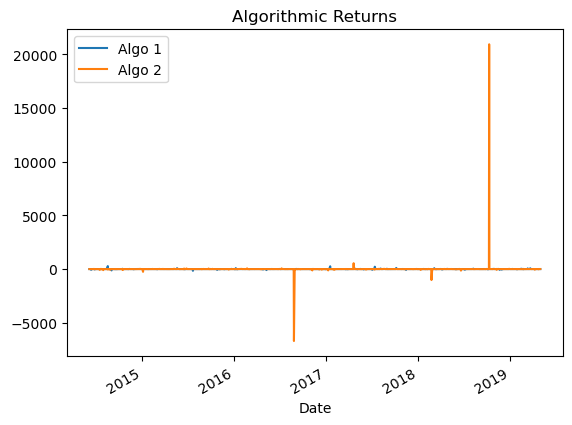

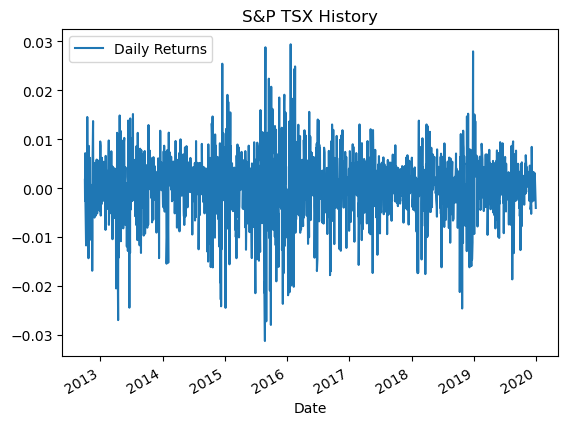

In [119]:
# Plot daily returns of all portfolios
whale_returns = whale_reader_df.pct_change()
whale_returns.plot(title = "Whale Returns")
algorithmic_returns = algorithmic_reader_df.pct_change()
algorithmic_returns.plot(title = "Algorithmic Returns")
sp_tsx_returns = sp_tsx_reader_df.pct_change()
sp_tsx_returns.plot(title = "S&P TSX History")

<Axes: title={'center': 'L Historical Plot'}, xlabel='Date'>

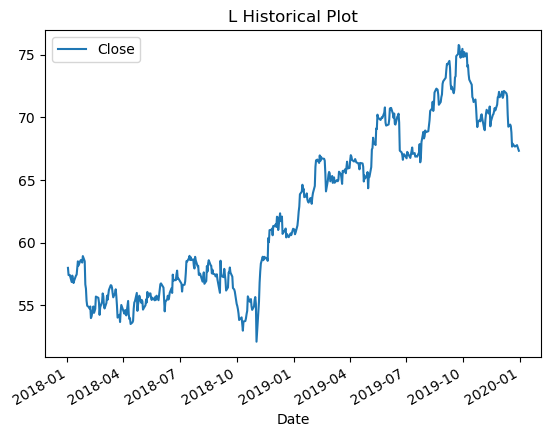

In [124]:
L_historical_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\l_historical.csv")
L_historical_df = pd.read_csv(L_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
L_historical_returns = L_historical_df.drop(columns = ["Symbol"])
L_historical_returns.head()
L_historical_returns.plot(title = "L Historical Plot")

<Axes: title={'center': 'OTEX Historical Plot'}, xlabel='Date'>

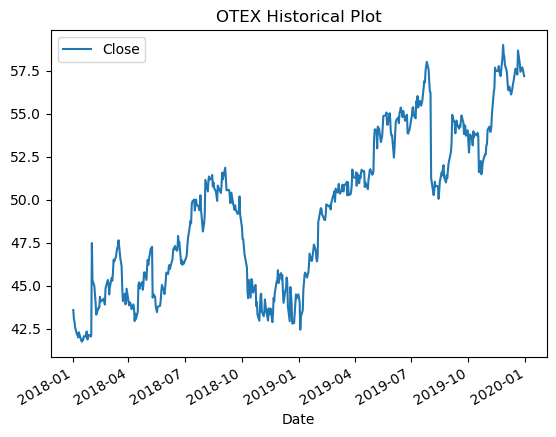

In [123]:
otex_historical_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_historical_returns = otex_historical_df.drop(columns = ["Symbol"])
otex_historical_returns.head()
otex_historical_returns.plot(title = "OTEX Historical Plot")

<Axes: title={'center': 'Shop Historical Plot'}, xlabel='Date'>

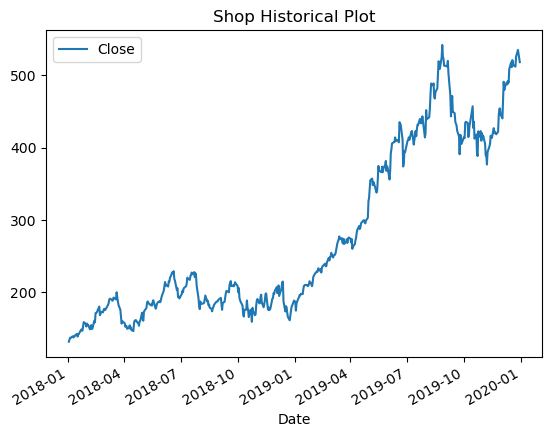

In [125]:
shop_historical_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_historical_returns = shop_historical_df.drop(columns = ["Symbol"])
shop_historical_returns.head()
shop_historical_returns.plot(title = "Shop Historical Plot")

#### Calculate and Plot cumulative returns.

C:\Users\Owner\anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

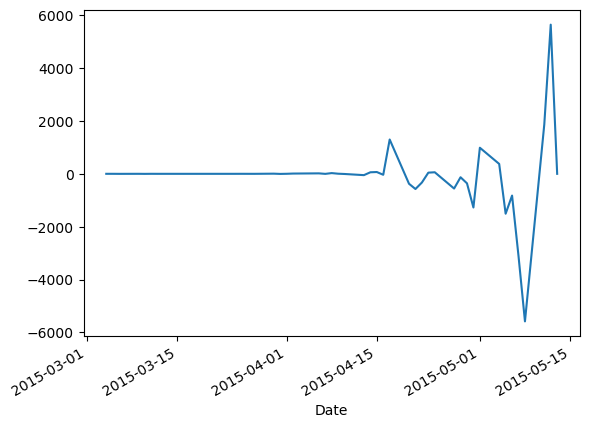

In [146]:
weights1 = [1/4, 1/4, 1/4, 1/4]
volatility_whale = whale_returns.std()*np.sqrt(252)
volatility_whale = volatility_whale.sort_values()
portfolio_returns_whale = whale_returns.dot(weights1)
cumulative_returns_whale = (1 + portfolio_returns_whale).cumprod()
cumulative_returns_whale.plot()

<Axes: xlabel='Date'>

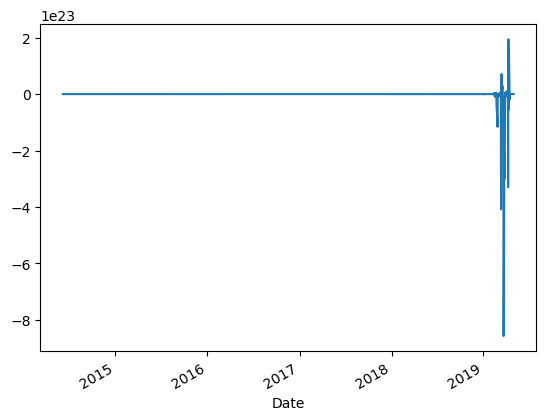

In [148]:
weights2 = [1/2, 1/2]
volatility_algorithmic = algorithmic_returns.std()*np.sqrt(252)
volatility_algorithmic = volatility_algorithmic.sort_values()
portfolio_returns_algorithmic = algorithmic_returns.dot(weights2)
cumulative_returns_algorithmic = (1 + portfolio_returns_algorithmic).cumprod()
cumulative_returns_algorithmic.plot()

<Axes: xlabel='Date'>

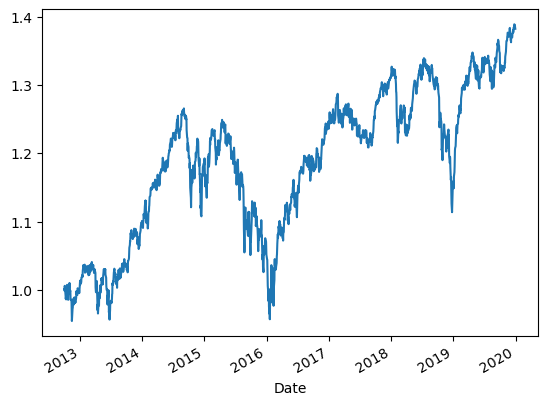

In [157]:
weights3 = [1]
volatility_sp_tsx = sp_tsx_returns.std()*np.sqrt(252)
volatility_sp_tsx = volatility_sp_tsx.sort_values()
portfolio_returns_sp_tsx = sp_tsx_returns.dot(weights3)
cumulative_returns_sp_tsx = (1 + portfolio_returns_sp_tsx).cumprod()
cumulative_returns_sp_tsx.plot()

C:\Users\Owner\anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

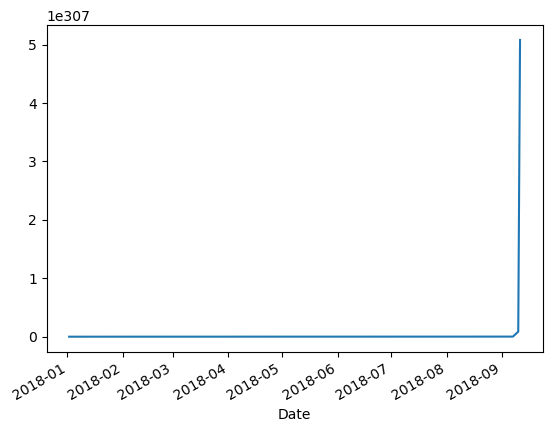

In [150]:
weights4 = [1]
volatility_L_historical = L_historical_returns.std()*np.sqrt(252)
volatility_L_historical = volatility_L_historical.sort_values()
portfolio_returns_L_historical = L_historical_returns.dot(weights4)
cumulative_returns_L_historical = (1 + portfolio_returns_L_historical).cumprod()
cumulative_returns_L_historical.plot()

In [156]:
weights5 = [1]
volatility_otex_historical = otex_historical_returns.std()*np.sqrt(252)
volatility_otex_historical = volatility_otex_historical.sort_values()
portfolio_returns_otex_historical = otex_historical_returns.dot(weights5)
cumulative_returns_otex_historical = (1 + portfolio_returns_otex_historical).cumprod()
#cumulative_returns_otex_historical.plot()

C:\Users\Owner\anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


C:\Users\Owner\anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

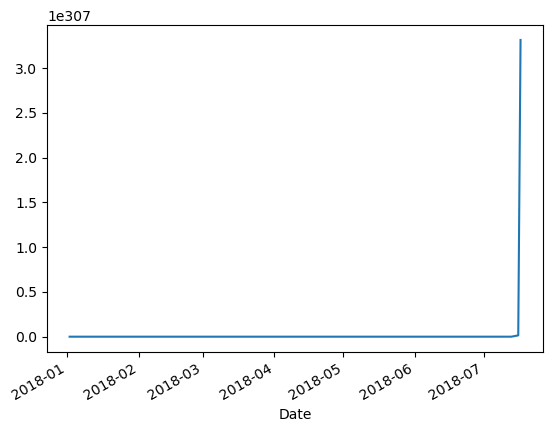

In [154]:
weights6 = [1]
volatility_shop_historical = shop_historical_returns.std()*np.sqrt(252)
volatility_shop_historical = volatility_shop_historical.sort_values()
portfolio_returns_shop_historical = shop_historical_returns.dot(weights6)
cumulative_returns_shop_historical = (1 + portfolio_returns_shop_historical).cumprod()
cumulative_returns_shop_historical.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [160]:
# Calculate the daily standard deviations of all portfolios
#daily_std = daily_returns.std()
daily_std_whale = whale_returns.std()
daily_std_algorithmic = algorithmic_returns.std()
daily_std_sp_tsx = sp_tsx_returns.std()
daily_std_whale, daily_std_algorithmic, daily_std_sp_tsx

(SOROS FUND MANAGEMENT LLC     NaN
 PAULSON & CO.INC.             NaN
 TIGER GLOBAL MANAGEMENT LLC   NaN
 BERKSHIRE HATHAWAY INC        NaN
 dtype: float64,
 Algo 1     17.054129
 Algo 2    626.914037
 dtype: float64,
 Daily Returns    0.006637
 dtype: float64)

### Determine which portfolios are riskier than the S&P TSX 60

In [166]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp_tsx

# Determine which portfolios are riskier than the S&P TSX 60


Daily Returns    0.006637
dtype: float64

### Calculate the Annualized Standard Deviation

In [165]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = single_df.rolling(window = 252).std()
annualized_std = annualized_std.dropna().copy()
annualized_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2016-03-08,0.008968,0.006518,0.009574,0.015108,0.009844,0.010129,954.322880
2016-03-09,0.008976,0.006541,0.009578,0.015112,0.009842,0.010140,951.972497
2016-03-10,0.008978,0.006537,0.009581,0.015112,0.009827,0.010151,949.849374
2016-03-11,0.009055,0.006604,0.009604,0.015210,0.009839,0.010213,947.289219
2016-03-14,0.009048,0.006604,0.009593,0.015188,0.009838,0.010189,945.463383
...,...,...,...,...,...,...,...
2019-04-25,0.008976,0.007109,0.014476,0.014715,0.008119,0.008389,626.574807
2019-04-26,0.008983,0.007131,0.014498,0.014726,0.008107,0.008395,628.465646
2019-04-29,0.008967,0.007123,0.014486,0.014730,0.008104,0.008390,630.106235


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [168]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21df = single_df.rolling(window = 21).std()
rolling_std_21df = rolling_std_21df.dropna().copy()
rolling_std_21df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,127.407628
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,116.630505
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,112.710636
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,112.482924
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,129.266187
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,167.397507
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,161.256601
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,152.890931


<Axes: xlabel='Date'>

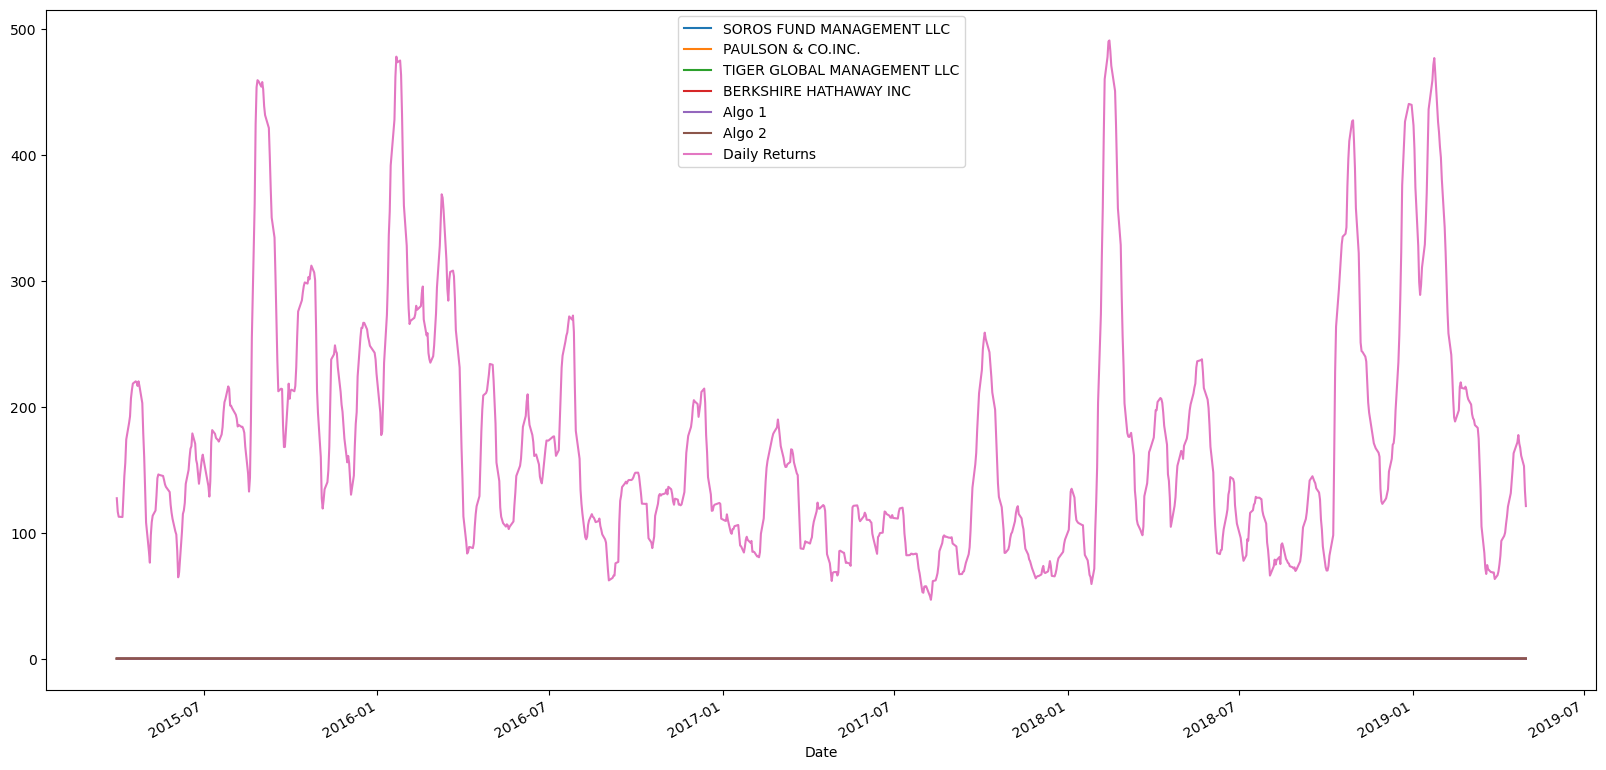

In [169]:
# Plot the rolling standard deviation
rolling_std_21df.plot(figsize = (20, 10))

### Calculate and plot the correlation

<Axes: >

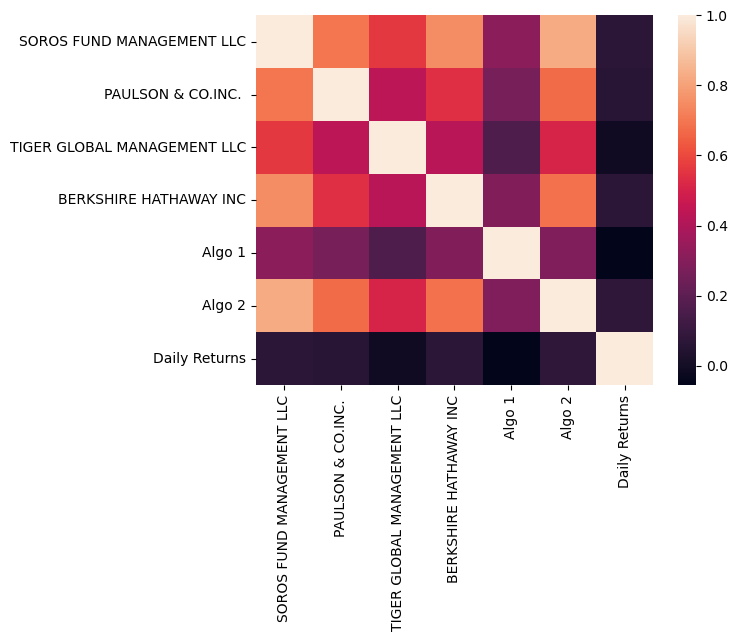

In [172]:
# Calculate the correlation
correlation = single_df.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [205]:
# Calculate covariance of a single portfolio
#whale_covariance = whale_returns["____"].cov(sp_tsx_returns)   #insert company name withing ""
whale_covariance

# Calculate variance of S&P TSX
sp_variance = sp_tsx_returns.cov()
sp_variance

# Computing beta
#company_name_beta = whale_covarriance / variance

# Plot beta trend
#company_name_beta.plot(figsize = (20, 10), title = "Company Name Beta Plot")

,Daily Returns
Daily Returns,0.000044


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [208]:
# Annualized Sharpe Ratios
#sharpe_ratios = ((single_df.mean() - single_df[" "].mean())*252) / (single_df.std()*np.sqrt(252))

In [210]:
# Visualize the sharpe ratios as a bar plot
#sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [245]:
# Reading data from 1st stock
L_historical_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\l_historical.csv")
L_historical_df = pd.read_csv(L_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [215]:
# Reading data from 2nd stock
otex_historical_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [216]:
# Reading data from 3rd stock
shop_historical_path = Path(r"C:\Users\Owner\OneDrive - University of Toronto\Desktop\FinTech Bootcamp\Assignments\Assignment 4\shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [234]:
# Combine all stocks in a single DataFrame
single_custom_df = pd.concat([L_historical_df, otex_historical_df, shop_historical_df], axis = "columns", join = "inner")
single_custom_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [235]:
# Reset Date index
single_custom_df = single_custom_df.sort_values("Date")
single_custom_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [243]:
# Reorganize portfolio data by having a column per symbol
#single_custom_df_merged = pd.merge(L_historical_df, otex_historical_df, shop_historical_df)
#single_custom_df_merged

In [261]:
# Calculate daily returns
L_historical_returns = L_historical_df.pct_change()
otex_historical_returns = otex_historical_df.pct_change()
shop_historical_returns = shop_historical_df.pct_change()

# Drop NAs
L_historical_returns = L_historical_returns.dropna().copy()
otex_historical_returns = otex_historical_returns.dropna().copy()
shop_historical_returns = shop_historical_returns.dropna().copy()

# Display sample data
L_historical_returns.head()
otex_historical_returns.head()
shop_historical_returns.head()

,Close
Date,
2018-01-03,0.023398
2018-01-04,0.017092
2018-01-05,-0.001455
2018-01-08,0.016392
2018-01-09,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [267]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
single_custom_returns_df = pd.concat([L_historical_returns, otex_historical_returns, shop_historical_returns], axis = "columns", join = "inner")
volatility_combo = single_custom_returns_df.std()*np.sqrt(252)
volatility_combo = volatility_combo.sort_values()
portfolio_returns = single_custom_returns_df.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [268]:
# Join your returns DataFrame to the original returns DataFrame
final_df = pd.concat([single_df, single_custom_returns_df], axis = "columns", join = "inner")
final_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,Close,Close,Close
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,16371.55,-0.010002,-0.011703,0.023398
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,16412.94,0.000174,-0.003715,0.017092
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,16349.44,0.000000,-0.007924,-0.001455
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,16317.65,-0.009753,-0.009631,0.016392
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,16319.24,0.008969,-0.000712,-0.011254
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10,0.007398,0.006224,-0.003240
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,-0.003672,0.000773,0.012628
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,0.002918,-0.006181,0.013173


In [269]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_df.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
Algo 1                         0.0
Algo 2                         0.0
Daily Returns                  0.0
Close                          0.0
Close                          0.0
Close                          0.0
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [270]:
# Calculate the annualized `std`
annualized_std_combo = final_df*np.sqrt(252)
annualized_std_combo.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,Close,Close,Close
Date,,,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,259890.299260,-0.158772,-0.185773,0.371439
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,260547.345141,0.002765,-0.058972,0.271329
2018-01-05,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,259539.313891,0.000000,-0.125783,-0.023097
2018-01-08,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,259034.663286,-0.154819,-0.152890,0.260219
2018-01-09,-0.016311,0.013847,0.028401,0.011244,-0.015939,-0.033187,259059.903753,0.142385,-0.011296,-0.178647


### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

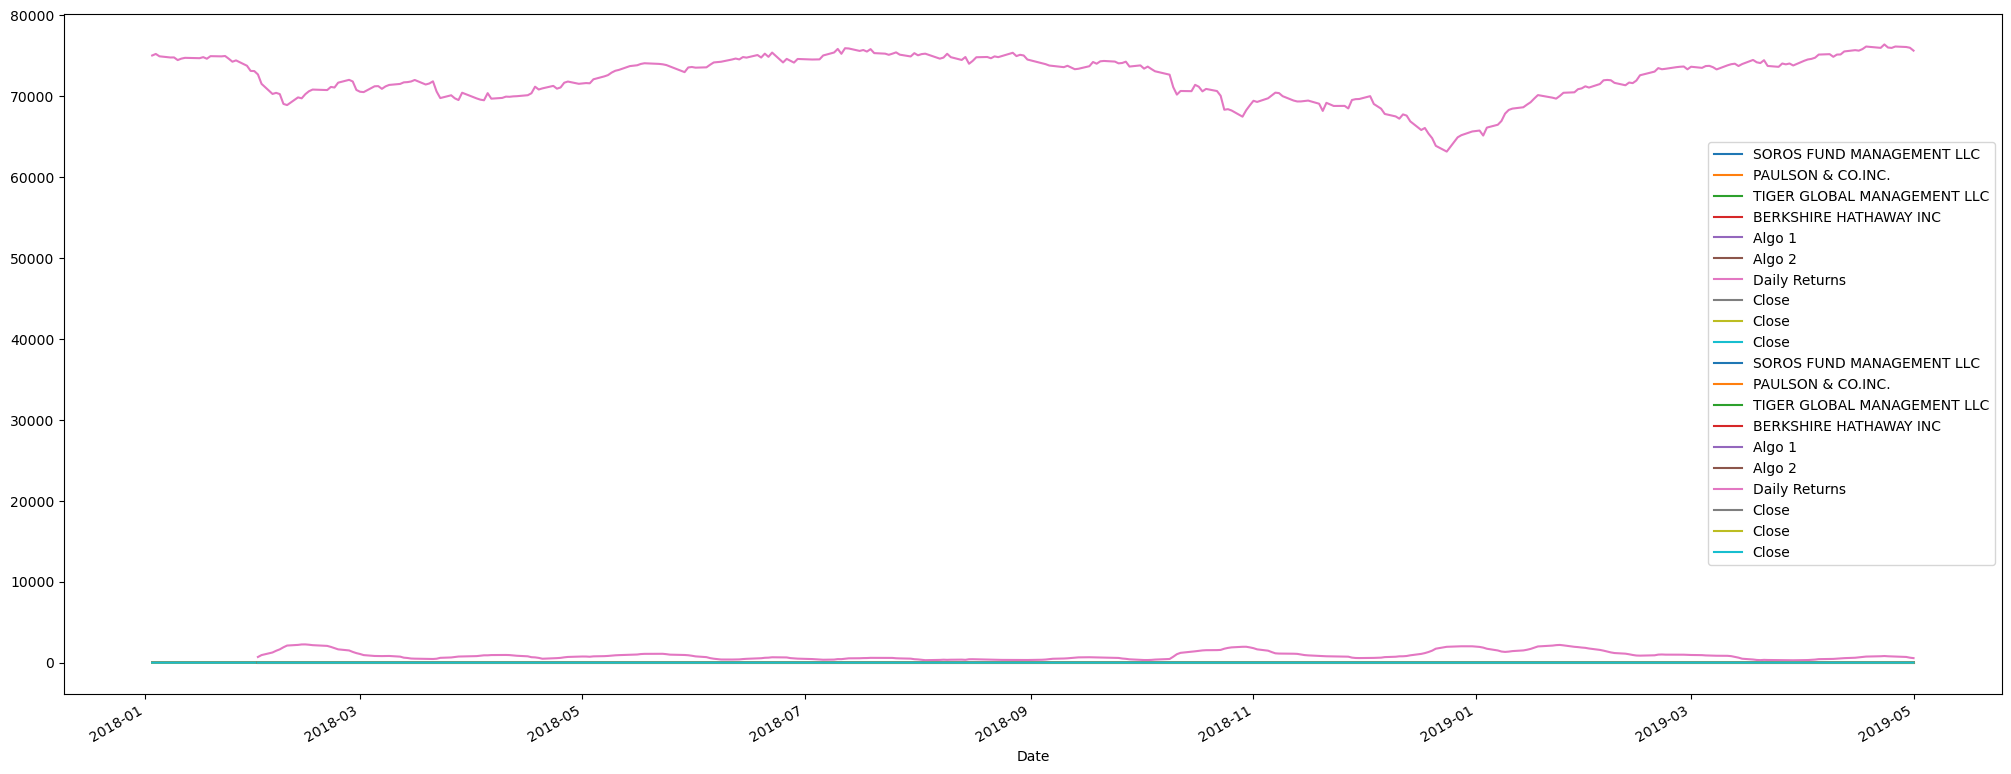

In [271]:
# Calculate rolling standard deviation
annualized_std_21day = final_df*np.sqrt(21)
annualized_std_21day.head()

# Plot rolling standard deviation
ax = annualized_std_21day.plot(figsize = (25, 10))
annualized_std_21day.rolling(window = 21).std().plot(ax = ax)


### Calculate and plot the correlation

<Axes: >

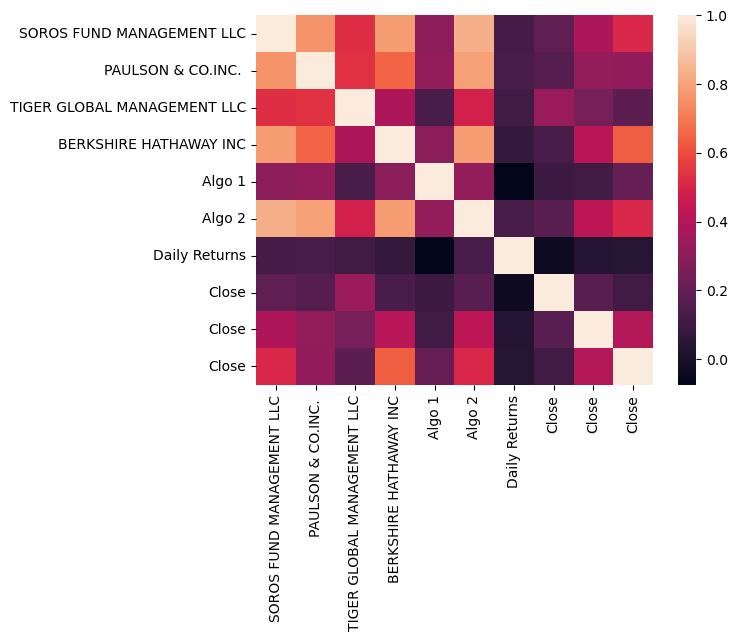

In [272]:
# Calculate and plot the correlation
correlation_combo = annualized_std_combo.corr()
sns.heatmap(correlation_combo)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [274]:
# Calculate and plot Beta
variance_combo = annualized_std_combo.var()
#covariance_combo = annualized_std_combo[" "].cov(annualized_std_combo["sp_tsx_returns"]) #insert company name within ""
#beta_combo = covariance_combo / variance_combo
variance_combo

SOROS FUND MANAGEMENT LLC      2.122108e-02
PAULSON & CO.INC.              1.307441e-02
TIGER GLOBAL MANAGEMENT LLC    4.832638e-02
BERKSHIRE HATHAWAY INC         5.173127e-02
Algo 1                         1.440669e-02
Algo 2                         1.895146e-02
Daily Returns                  8.856452e+07
Close                          2.653876e-02
Close                          5.094183e-02
Close                          2.540956e-01
dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
#sharpe_ratios_combo = ((annualized_std_combo.mean() - annualized_std_combo[" "].mean())*252) / (annualized_std_combo.std()*np.sqrt(252))

In [ ]:
# Visualize the sharpe ratios as a bar plot
#sharpe_ratios_combo.plot(kind = "bar", title = "Sharpe Ratios (Sll Portfolios)")

### How does your portfolio do?

Write your answer here!